In [ ]:
!nvidia-smi
!python --version

/bin/bash: line 1: nvidia-smi: command not found
Python 3.11.11


## 1 Prepare environment
1.1. Import astronomical packages
+ `lightkurve` - [library](https://lightkurve.github.io/lightkurve/index.html) library for discovery Kepler and Tess datasets
+ `astropy` - [library](https://www.astropy.org/) designed for astronomy and astrophysics. It provides a comprehensive suite of tools for handling astronomical data, performing scientific computations, and supporting research workflows

In [45]:
import io

# astronomy packages
try:
  import lightkurve as lk
except:
  !pip install lightkurve --upgrade
  # ffmpeg animation library
  !apt-get install -y ffmpeg
  import lightkurve as lk

try:
  import astropy as ast
except:
  !pip install astropy --upgrade
  import astropy as ast

# math packages
import numpy as np
import pandas as pd

# visualization packages
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# Check versions
print('Lightkurve version: ' + lk.__version__)
print('Astropy version: ' + ast.__version__)
print('Numpy version: ' + np.__version__)
print('Matplotlib version: ' + matplotlib.__version__)
print('Pandas version: ' + pd.__version__)


Lightkurve version: 2.5.0
Astropy version: 7.0.0
Numpy version: 1.26.4
Matplotlib version: 3.10.0
Pandas version: 2.2.2


## 2 Define interested starts
Definied starts available from TESS Input Catalog (TIC) and append prefix TIC.

In [46]:
def append_prefix(df: pd.DataFrame,
                  prefix="TIC "):
  # Initialize an empty list
  list = []

  # Iterate through each number in the dataframe
  for num in df[0]:
      list.append(f"{prefix}{num}")

  # Convert to a NumPy array
  return np.array(list)

In [47]:
star_name = ["TIC 116986071"]
star_names_50_1_url = "https://raw.githubusercontent.com/serhiikartashov/discovery-astronomic-objects/refs/heads/main/data/tess_vstars_50_1.csv"
df = pd.read_csv(star_names_50_1_url, header=None)

# Convert to a NumPy array
star_names_50_1 = append_prefix(df)

# Print the final array
print(star_names_50_1)

['TIC 116986071' 'TIC 1551778142' 'TIC 159332859' 'TIC 187531837'
 'TIC 198183379' 'TIC 219100171' 'TIC 229510866' 'TIC 229704090'
 'TIC 229752721' 'TIC 229937189' 'TIC 230019644' 'TIC 230071306'
 'TIC 230083885' 'TIC 230381054' 'TIC 233745344' 'TIC 237116143'
 'TIC 237201691' 'TIC 237205536' 'TIC 237206223' 'TIC 237213653'
 'TIC 251105281' 'TIC 251333156' 'TIC 252452281' 'TIC 260694891'
 'TIC 263931812' 'TIC 275259749' 'TIC 281482721' 'TIC 288268074'
 'TIC 29221935' 'TIC 315756675' 'TIC 327756689' 'TIC 329351663'
 'TIC 341839700' 'TIC 341871585' 'TIC 351695758' 'TIC 353241568'
 'TIC 353257675' 'TIC 364184518' 'TIC 366873414' 'TIC 376869068'
 'TIC 388565206' 'TIC 392126428' 'TIC 392569693' 'TIC 429059113'
 'TIC 441765151' 'TIC 446041643' 'TIC 467835395' 'TIC 82243350'
 'TIC 85855399' 'TIC 94541786']


## 3 Collect datasets

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

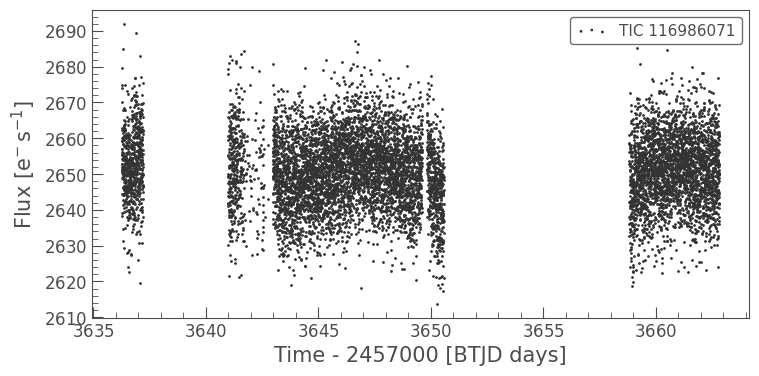

In [37]:
lc = lk.search_lightcurve(target=f"TIC 116986071", sector=86, mission="TESS").download();
lc.scatter();

In [48]:
pixelfile = lk.search_targetpixelfile("TIC 116986071", sector=86, mission="TESS").download();
pixelfile.animate()

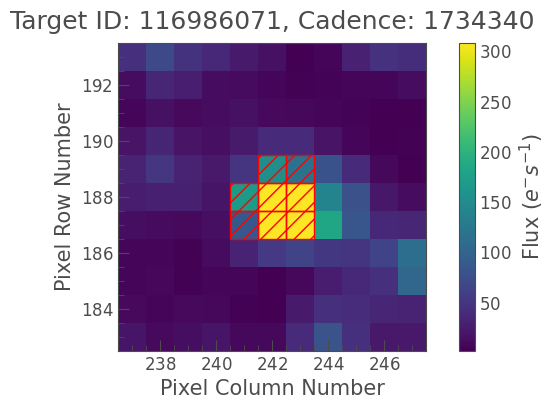

In [49]:
pixelfile = lk.search_targetpixelfile("TIC 116986071", sector=86, mission="TESS").download();
pixelfile.plot(aperture_mask="pipeline");

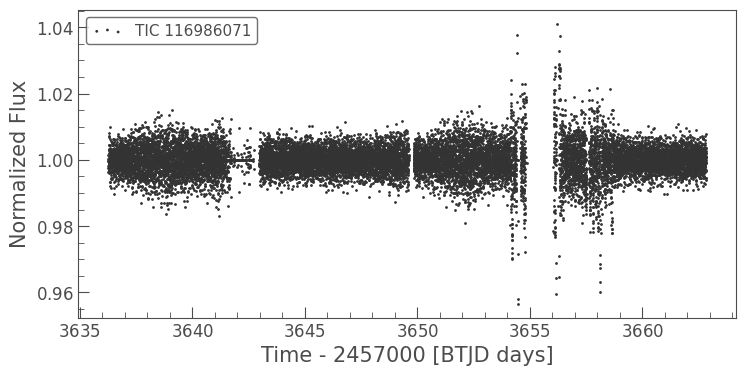

In [50]:
pixelfile = lk.search_targetpixelfile("TIC 116986071", sector=86, mission="TESS").download();
pixelfile.to_lightcurve(method="pld").remove_outliers().flatten().scatter();

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

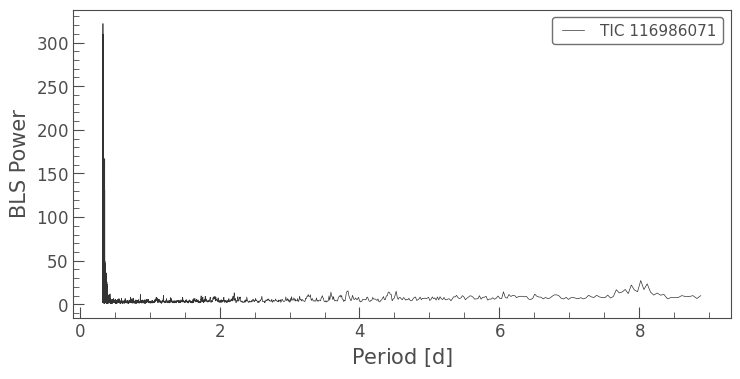

In [51]:
pixelfile = lk.search_targetpixelfile("TIC 116986071", sector=86, mission="TESS").download();
lc = pixelfile.to_lightcurve(method="pld").remove_outliers().flatten();
lc.to_periodogram("bls").plot()

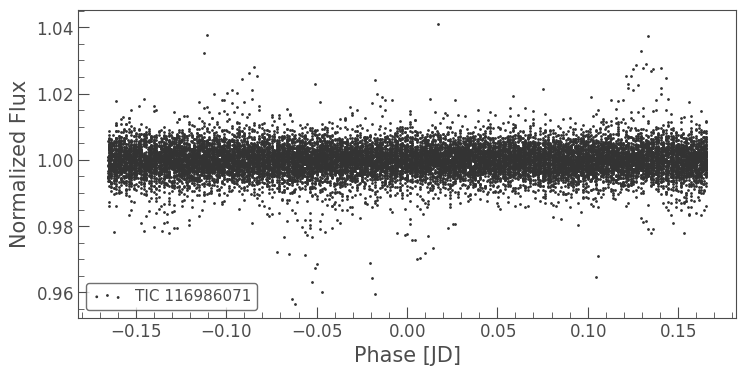

In [52]:
pixelfile = lk.search_targetpixelfile("TIC 116986071", sector=86, mission="TESS").download();
lc = pixelfile.to_lightcurve(method="pld").remove_outliers().flatten();
period = lc.to_periodogram("bls").period_at_max_power
lc.fold(period).scatter();

In [ ]:
pixelfile.to_lightcurve(method="pld").scatter();

In [ ]:
lc = pixelfile.to_lightcurve(method="pld").remove_outliers().flatten();
period = lc.to_periodogram("bls").period_at_max_power

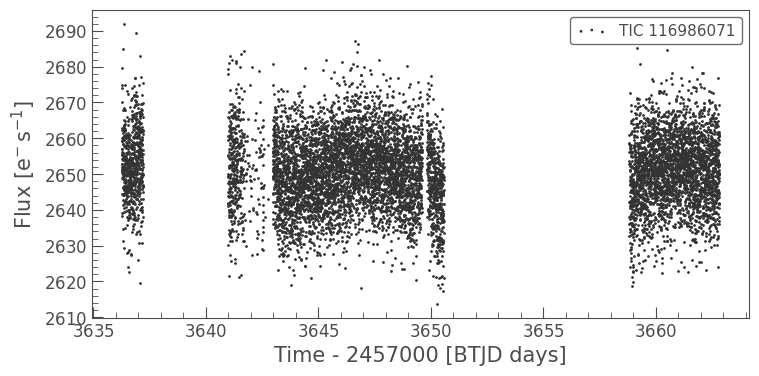

In [53]:
lc = lk.search_lightcurve(target=f"TIC 116986071", sector=86, mission="TESS").download();
lc.scatter();

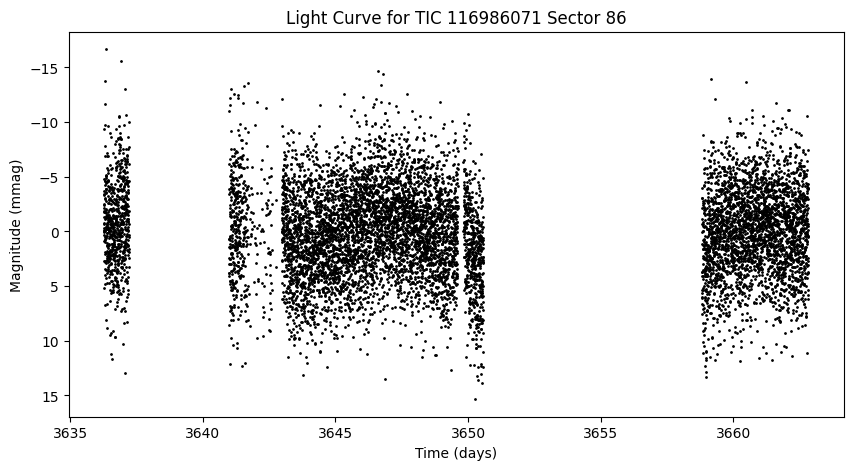

In [54]:
# Normalize flux by median value
median_flux = np.nanmedian(lc.flux)

# Convert flux to millimagnitudes
mmag = -2.5 * np.log10(lc.flux / median_flux) * 1000  # Convert to mmag

# Plot the light curve in millimagnitudes
plt.figure(figsize=(10, 5))
# Convert time to a numeric format
time_numeric = lc.time.value  # Extract time as float values
plt.plot(time_numeric, mmag, 'k.', markersize=2)
plt.xlabel("Time (days)")
plt.ylabel("Magnitude (mmag)")
plt.gca().invert_yaxis()  # Magnitudes decrease as brightness increases
plt.title("Light Curve for TIC 116986071 Sector 86")
plt.show()

In [55]:
lc.show_properties()

    Attribute                       Description                 
------------------ ---------------------------------------------
has_masked_columns                                         False
 has_masked_values                                          True
 has_mixin_columns                                          True
            masked                                         False
          colnames                                list length 24
           indices                                 list length 1
              flux                                array (17807,)
          flux_err                                array (17807,)
           columns    <class 'astropy.table.table.TableColumns'>
             dtype              <class 'numpy.dtypes.VoidDType'>
         formatter <class 'astropy.table.pprint.TableFormatter'>
            groups    <class 'astropy.table.groups.TableGroups'>
              iloc       <class 'astropy.table.index.TableILoc'>
               loc       

<Figure size 1000x600 with 0 Axes>

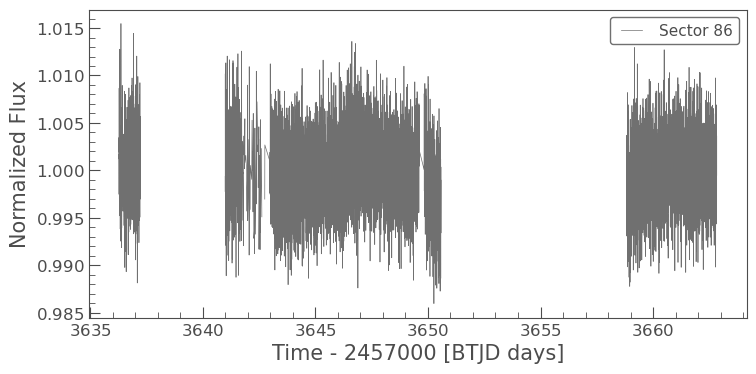

<Figure size 1000x600 with 0 Axes>

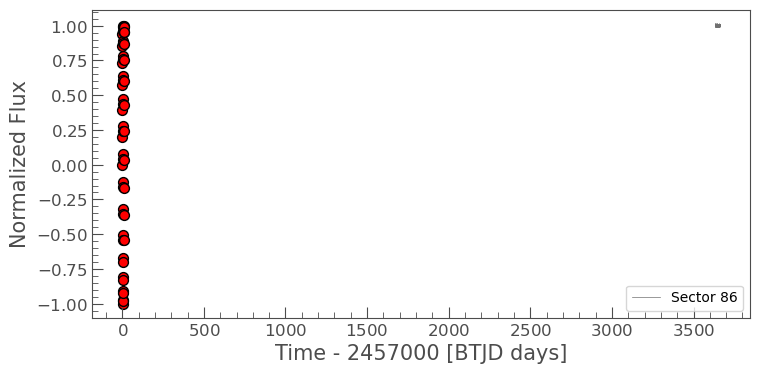

In [ ]:
# # Create a figure
# plt.figure(figsize=(10, 6))

# lc_collection = search_lightcurve("TIC 116986071", sector=86, mission="TESS").download_all();

# for lc in lc_collection:
#     (lc.normalize()).plot(label=f"Sector {lc.sector}", alpha=0.7)

# x = np.linspace(0, 10, 50)  # 50 points between 0 and 10
# y = np.sin(x)

# plt.scatter(x, y, s=50, c='red', marker='o', edgecolors='black')
# plt.legend()
# plt.show()

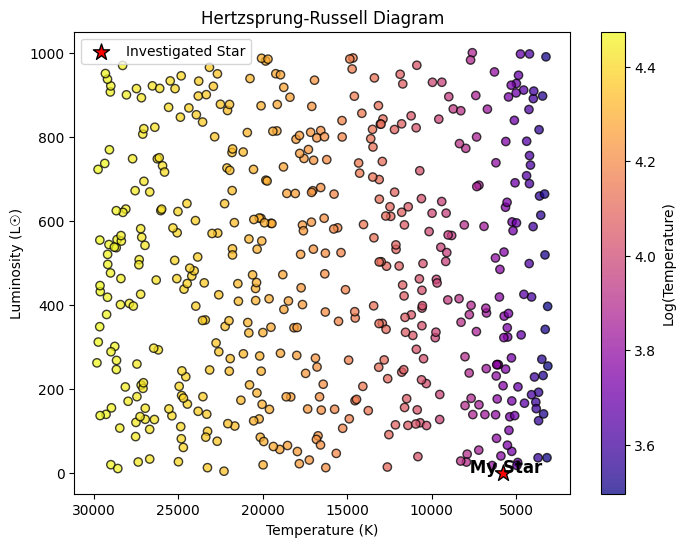

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic dataset (random stars)
np.random.seed(42)
temperature = np.random.uniform(3000, 30000, 500)  # Stellar temperatures (Kelvin)
luminosity = np.random.uniform(0.001, 1000, 500)  # Stellar luminosities (relative to Sun)

# Step 2: Define your specific star's data (Example: Sun)
my_star_temp = 5778  # Kelvin
my_star_lum = 1       # Solar Luminosity

# Step 3: Create H-R Diagram
plt.figure(figsize=(8, 6))
sc = plt.scatter(temperature, luminosity, c=np.log10(temperature), cmap='plasma', edgecolors='k', alpha=0.75)

# Reverse X-axis (Hot stars on the left, Cool stars on the right)
plt.gca().invert_xaxis()

# Step 4: Highlight your investigated star
plt.scatter(my_star_temp, my_star_lum, color='red', edgecolors='black', s=150, marker='*', label="Investigated Star")

# Step 5: Add Annotation
plt.text(my_star_temp, my_star_lum*1.5, " My Star", fontsize=12, color='black', ha='center', fontweight='bold')

# Labels and Title
plt.xlabel("Temperature (K)")
plt.ylabel("Luminosity (L☉)")
plt.title("Hertzsprung-Russell Diagram")

# Colorbar for temperature scale
cbar = plt.colorbar(sc, label="Log(Temperature)")

# Show Legend
plt.legend()

# Display the plot
plt.show()


In [59]:
# Read in data that will be used for the calculations.
data = pd.read_csv("https://github.com/adamlamee/CODINGinK12/raw/master/data/stars.csv")

In [60]:
# We wish to look at the first 5 rows of our data set
data.head(5)

proper         ra        dec    dist    mag  absmag     ci  \
0               Sol   0.000000   0.000000  0.0000 -26.70   4.850  0.656   
1  Proxima Centauri  14.495985 -62.679485  1.2959  11.01  15.447  1.807   
2   Rigil Kentaurus  14.660765 -60.833976  1.3248  -0.01   4.379  0.710   
3               NaN  14.660346 -60.838300  1.3248   1.35   5.739  0.900   
4    Barnard's Star  17.963472   4.693388  1.8238   9.54  13.235  1.570   

          temp         x         y         z  con       lum    var  var_min  \
0  5756.588113  0.000005  0.000000  0.000000  NaN  1.000000    NaN      NaN   
1  3383.441193 -0.472264 -0.361451 -1.151219  Cen  0.000058   V645   11.079   
2  5567.728737 -0.495203 -0.414084 -1.156625  Cen  1.543121    NaN    0.113   
3  4996.415833 -0.495181 -0.413973 -1.156674  Cen  0.440961    NaN      NaN   
4  3691.168543 -0.017373 -1.816613  0.149123  Oph  0.000443  V2500    9.590   

   var_max  
0      NaN  
1   10.939  
2   -0.087  
3      NaN  
4    9.490

In [61]:
# The .shape command displays the (number of rows , number of columns) in a file.
data.shape

(119614, 16)

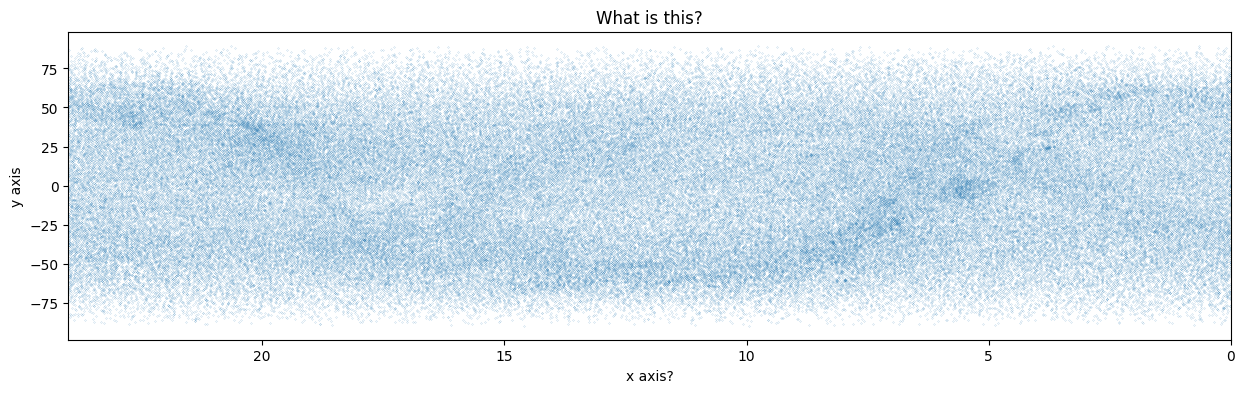

In [62]:
fig = plt.figure(figsize=(15, 4))
plt.scatter(data['ra'],data['dec'], s=0.01)
plt.xlim(24, 0)
plt.title("What is this?")
plt.xlabel("x axis?")
plt.ylabel("y axis");

Text(0.5, 0, 'Log T (log K)')

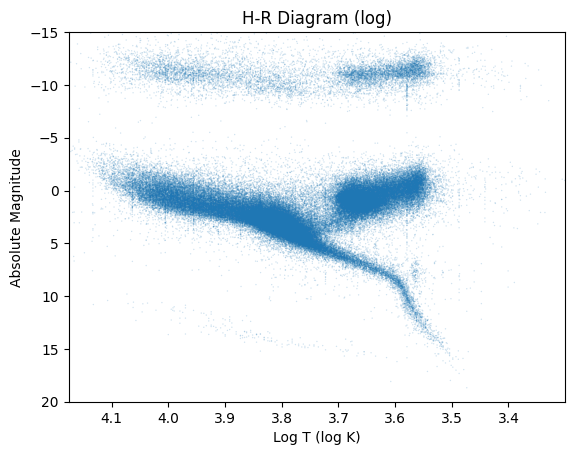

In [63]:
# format the points on the plot
transparency = 0.2
size = 1

# draws a scatter plot
plt.scatter(np.log10(data.temp), data.absmag, s=size, edgecolors='none', alpha=transparency)
plt.xlim(np.log10(15000),np.log10(2000))
plt.ylim(20,-15)
plt.title("H-R Diagram (log)")
plt.ylabel("Absolute Magnitude")
plt.xlabel("Log T (log K)")

In [64]:
# These are the abbreviations for all the constellations
data['con'].sort_values().unique()

array(['And', 'Ant', 'Aps', 'Aql', 'Aqr', 'Ara', 'Ari', 'Aur', 'Boo',
       'CMa', 'CMi', 'CVn', 'Cae', 'Cam', 'Cap', 'Car', 'Cas', 'Cen',
       'Cep', 'Cet', 'Cha', 'Cir', 'Cnc', 'Col', 'Com', 'CrA', 'CrB',
       'Crt', 'Cru', 'Crv', 'Cyg', 'Del', 'Dor', 'Dra', 'Equ', 'Eri',
       'For', 'Gem', 'Gru', 'Her', 'Hor', 'Hya', 'Hyi', 'Ind', 'LMi',
       'Lac', 'Leo', 'Lep', 'Lib', 'Lup', 'Lyn', 'Lyr', 'Men', 'Mic',
       'Mon', 'Mus', 'Nor', 'Oct', 'Oph', 'Ori', 'Pav', 'Peg', 'Per',
       'Phe', 'Pic', 'PsA', 'Psc', 'Pup', 'Pyx', 'Ret', 'Scl', 'Sco',
       'Sct', 'Ser', 'Sex', 'Sge', 'Sgr', 'Tau', 'Tel', 'TrA', 'Tri',
       'Tuc', 'UMa', 'UMi', 'Vel', 'Vir', 'Vol', 'Vul', nan], dtype=object)

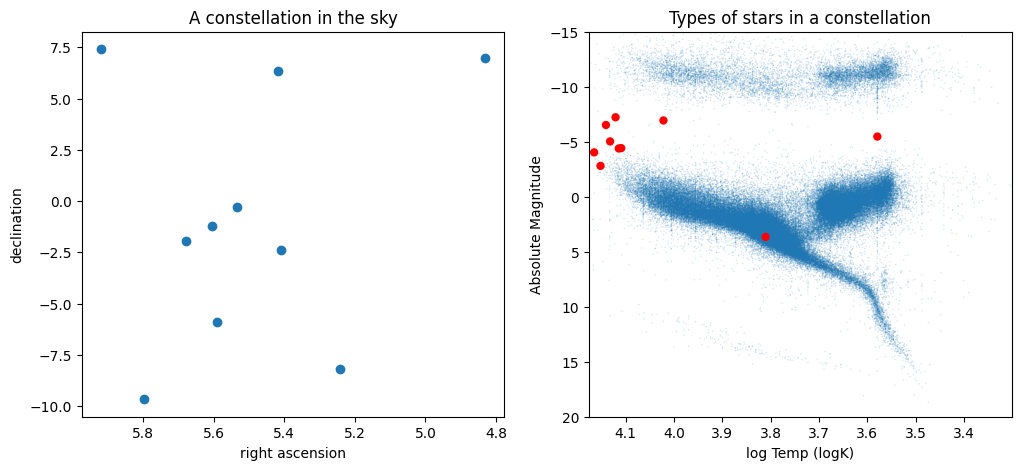

In [65]:
# This picks a constellation to plot
constellation = data.query('con == "Ori"') # Ori is short for Orion

plt.close('all')
fig = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

# This plots where the constellation's 10 brightest stars are in the sky
constellation = constellation.sort_values('mag').head(10)
plt.scatter(constellation['ra'],constellation['dec'])
plt.gca().invert_xaxis()
plt.title("A constellation in the sky")
plt.xlabel("right ascension")
plt.ylabel("declination")

plt.subplot(1, 2, 2)
# format the points on the plot
transparency = 0.2
size = 1

# plots the constellation's stars in red over the big plot of all stars
plt.scatter(np.log10(data['temp']), data['absmag'], s=size, edgecolors='none', alpha=transparency)
logtemps = np.log10(constellation['temp'])
#plt.scatter(constellation['temp'], constellation['absmag'], color='red', edgecolors='none')
plt.scatter(logtemps, constellation['absmag'], color='red', edgecolors='none')
#plt.xlim(2000,15000)
plt.xlim(np.log10(15000),np.log10(2000))
plt.ylim(20,-15)
plt.title("Types of stars in a constellation")
plt.ylabel("Absolute Magnitude")
plt.xlabel("log Temp (logK)")
plt.show()

## 4 Show all starts on HR Diagram

![img](https://openstax.org/apps/archive/20250116.201611/resources/dd3b626194347b820b300c0437928fdb31869efd)

http://www.astronexus.com/projects/hyg
https://github.com/astronexus/HYG-Database/tree/main


https://github.com/astronexus/ATHYG-Database/tree/main - 2million records

https://www.youtube.com/watch?v=8iSy3w5LQwo